In [174]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import preprocessing
import random
import seaborn as sns

import astropy.io.fits as fits

%matplotlib inline

In [19]:
ls 

BlackHoles/             FATS_features/          nicedata_for_daniela/
ChoNotes.txt            Feature Extraction.pdf  to_do.txt
DEC Model.pdf           Kmeans.ipynb
FATS/                   dec/


In [32]:
path_to_time_series = "nicedata_for_daniela/"

times = []
rates = []
errors = []

for filename in sorted(os.listdir(path_to_time_series)):
    #print("Current File Being Processed is: " + filename)
    with fits.open(path_to_time_series+filename, memmap=False) as example:
        hdu = example[1]
        time = hdu.data.field("TIME")
        rate = hdu.data.field("RATE")
        error = hdu.data.field("ERROR")
        times.append(time)
        rates.append(rate)
        errors.append(error)
        del example
        
print(len(times), len(errors), len(rates))

13496 13496 13496


In [41]:
head = ['Amplitude', 'AndersonDarling', 'Autocor_length', 'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e', 'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35', 'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65', 'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0', 'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2', 'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_0', 'Freq1_harmonics_rel_phase_1', 'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3', 'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1', 'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3', 'Freq2_harmonics_rel_phase_0', 'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2', 'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0', 'Freq3_harmonics_amplitude_1', 'Freq3_harmonics_amplitude_2', 'Freq3_harmonics_amplitude_3', 'Freq3_harmonics_rel_phase_0', 'Freq3_harmonics_rel_phase_1', 'Freq3_harmonics_rel_phase_2', 'Freq3_harmonics_rel_phase_3', 'LinearTrend', 'MaxSlope', 'Mean', 'Meanvariance', 'MedianAbsDev', 'MedianBRP', 'PairSlopeTrend', 'PercentAmplitude', 'PercentDifferenceFluxPercentile', 'PeriodLS', 'Period_fit', 'Psi_CS', 'Psi_eta', 'Q31', 'Rcs', 'Skew', 'SlottedA_length', 'SmallKurtosis', 'Std', 'StetsonK', 'StetsonK_AC']
df = pd.read_csv("FATS_features/features_1000.csv", names = head)
df.head()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Con,Eta_e,FluxPercentileRatioMid20,...,Psi_CS,Psi_eta,Q31,Rcs,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC
0,328.5,0.379420,1.0,0.323656,9423.082805,163.625419,1.268593e+00,0.000000,1.578487,0.155357,...,0.099539,1.703918,237.0,0.108052,0.025452,1.0,-0.130757,171.183824,0.803425,0.595188
1,221.0,1.000000,3.0,0.006250,0.000002,156.011353,3.615728e+09,0.002088,0.258418,0.151762,...,0.064306,0.525431,151.0,0.064306,13.697982,3.0,209.578808,367.349482,0.371133,0.352287
2,456.0,0.999562,47.0,0.324721,2338.772687,115.728815,5.663617e+00,0.000000,0.977887,0.170410,...,0.284144,0.978571,323.0,0.284144,0.136157,51.0,-0.122669,232.270528,0.807068,0.517589
3,399.0,0.985592,8.0,0.321380,2782.742439,107.792931,4.593173e+00,0.000684,1.196241,0.162722,...,0.233606,1.197058,284.5,0.233606,0.084299,8.0,-0.140195,205.340558,0.804812,0.494004
4,402.0,0.999971,4.0,0.294603,1446.276861,62.002654,1.103539e+01,0.004876,1.168413,0.137574,...,0.117059,1.169289,261.0,0.117059,0.101714,4.0,0.301913,201.301749,0.784396,0.625976


In [42]:
df.shape

(1000, 59)

In [51]:
data_path = "FATS_features/"
df = pd.DataFrame()
for filename in os.listdir(data_path):
    small_df = pd.read_csv(data_path + filename, header = None)
    df = df.append(small_df)
df.columns = head
df.shape
    

(13496, 59)

In [52]:
df = df.replace('MISSING', np.nan)
df = df.replace('Missing', np.nan)
for col in df.columns.values:
    df[col] = df[col].astype(float)
df = df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [55]:
shuffled = df.iloc[np.random.permutation(len(df))]

In [12]:
X = preprocessing.normalize(np.array(shuffled))

In [96]:
inertias = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter = 1000).fit(X)
    inertias.append(kmeans.inertia_ )

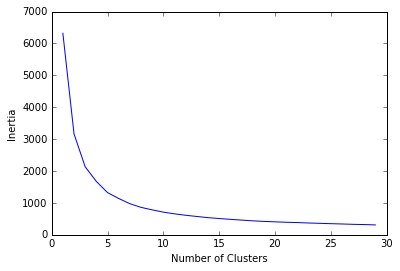

In [97]:
plt.plot(range(1,30), inertias)
plt.ylabel("Inertia")
plt.xlabel("Number of Clusters")
plt.show()

In [56]:
kmeans = KMeans(n_clusters=5, random_state=0, max_iter = 1000).fit(X)

assignments = kmeans.labels_
assignments_lst = list(assignments)
for i in range(5):
    print(assignments_lst.count(i)) 

3710
3243
1155
2753
2635


In [57]:
np.random.shuffle(X)
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
low_dim = tsne.fit_transform(X[:500,:])
low_dim.shape

(500, 2)

In [198]:
def cluster(num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter = 10000).fit(X)
    
    plot = []
    for i in range(low_dim.shape[0]):
        plot.append(low_dim[i,:])
    assignments = kmeans.labels_[:low_dim.shape[0]]
    clusters = [[] for i in range(num_clusters)]
    indexes = [[] for i in range(num_clusters)]
    for i, (item, clustNum) in enumerate(zip(plot,assignments)):
        clusters[clustNum].append(item)
        indexes[clustNum].append(i)
    colors = list("bgrcmyk")
    plt.figure(figsize=(6,5))
    for (i,cluster) in enumerate(clusters):
        plt.scatter([item[0] for item in cluster],[item[1] for item in cluster], color=np.random.rand(3,), label = ("Cluster %d" %(i+1)))        
    plt.title("TSNE with %d Clusters" % num_clusters, fontsize = 12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 12)
    plt.show()
    #colors[i % len(colors)]
    return indexes

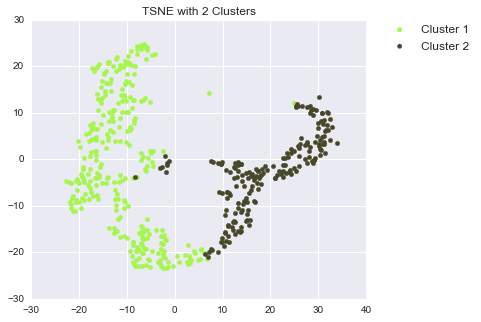

In [199]:
indexes = cluster(2)

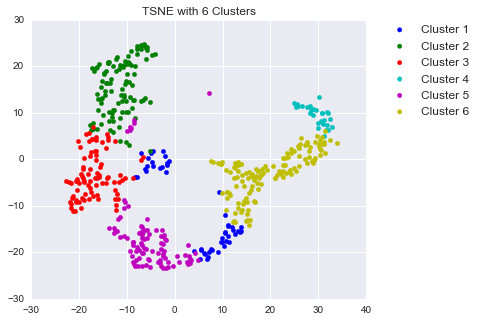

In [131]:
indexes = cluster(6)

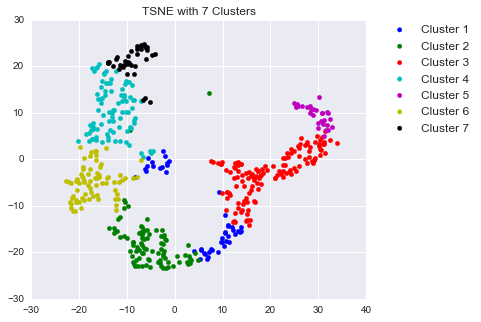

In [133]:
indexes = cluster(7)

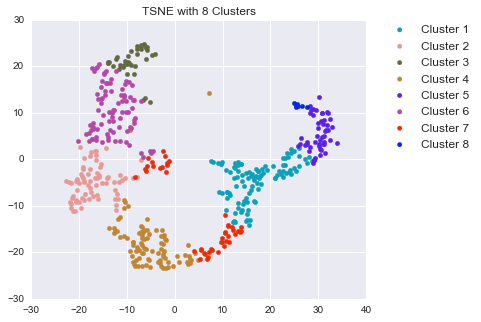

In [155]:
indexes = cluster(8)

In [238]:
def plot_random_sample(cluster_indexes):
    Color = [ 1 ,0.498039, 0.313725];
    indexes = random.sample(range(1, len(cluster_indexes)), 3)
    for index in indexes:
        plt.figure(figsize=(30,5))
        p = plt.plot(times[index][:250], rates[index][:250], '*-', color=Color, alpha = 0.6)
        plt.xlabel("Time")
        plt.ylabel("Magnitude")
        #plt.gca().invert_yaxis()
        plt.show()

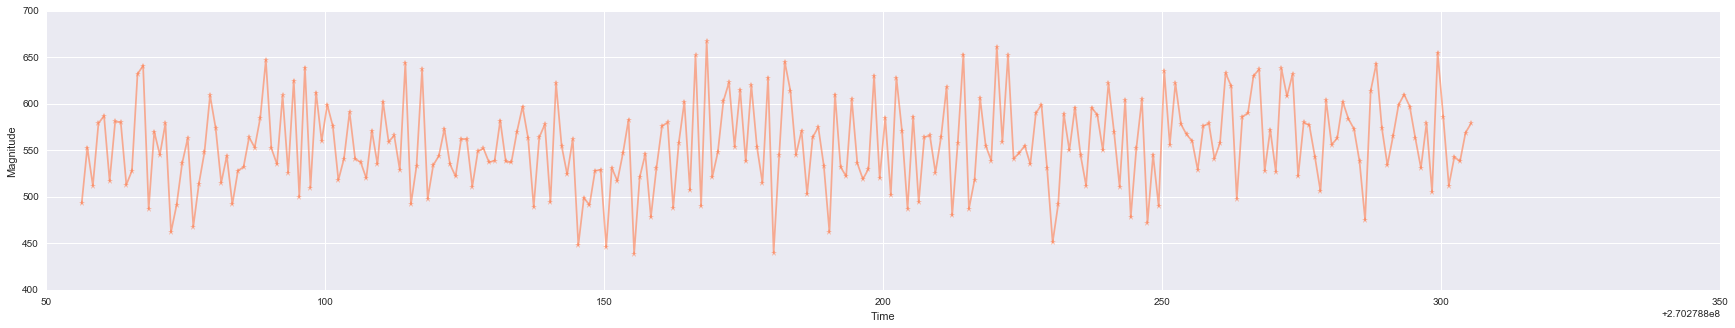

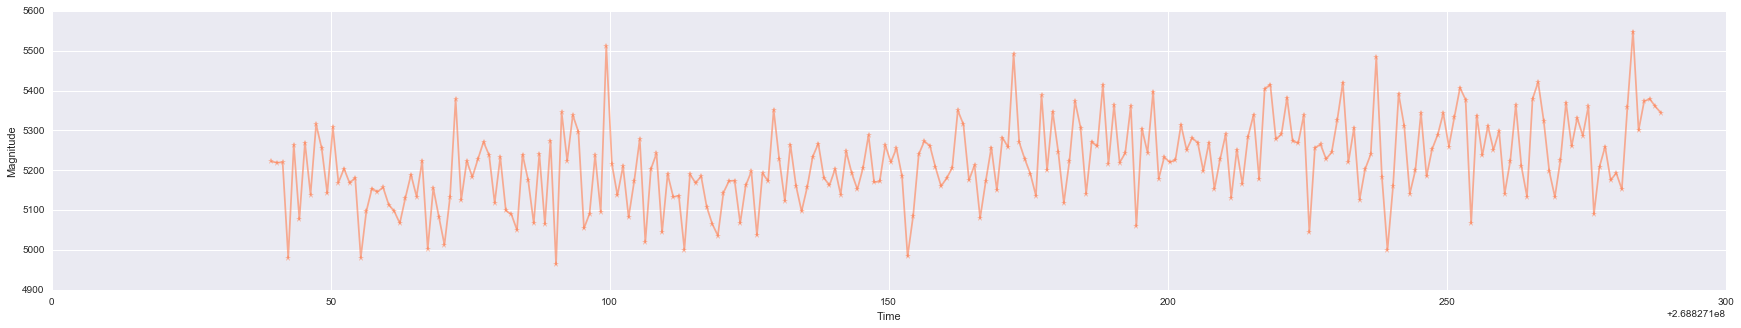

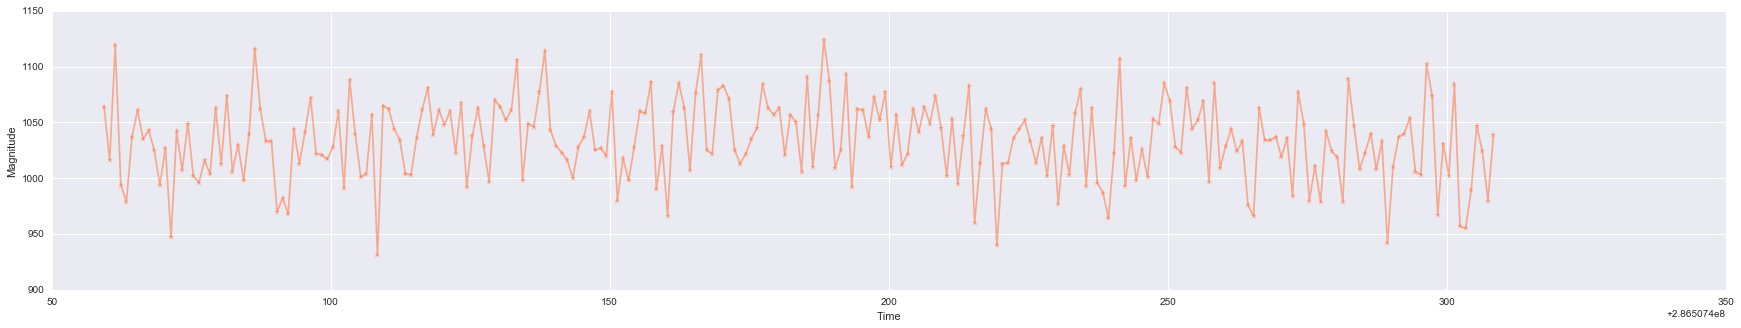

In [239]:
plot_random_sample(indexes[1])

In [56]:
def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    plt.figure(figsize=(18, 18))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        '''plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')'''

1

Gaussian Mixture Model
Histogram plots of FATS features
Scatter plot as two features against each other